In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import NumPy


In [3]:
data_path = r'C:\Users\fadia\OneDrive\Desktop\Ody\Scripts\Transformed Data\Master Combined\Master_Sales_Data_2021-08-19_to_2025-07-22.csv'
df=pd.read_csv(data_path)
df['Day_Date'] = pd.to_datetime(df['Day_Date'])

In [22]:
# i want to get each item containsing 'Btl' in its name
items = df['Item'].unique()
items = [item for item in items if 'Btl' in item]
items

['J.W Black Label Btl',
 'Woodford Reserved Btl',
 'Tanqueray Btl',
 'Hendricks Btl',
 'Chivas Regal Xv - Btl',
 'Bacardi Spiced.Btl',
 'Buffalo Trace Btl',
 'Tavernello Pinot Grigio-Btl',
 'Peroni Btl',
 'Don Julio Reposado Btl',
 'Teeling - Btl',
 'Russian Standard Btl',
 'Bombay Btl',
 'Glenfiddich 15 Btl',
 'Ksara Merwah-Btl',
 'Danzante Pinot Grigio-Btl',
 'Jameson Btl',
 'Bottega Rose 20 Cl-Btl',
 'J.W Gold Reserve Btl',
 'Santa Digna Sauvignon Blanc- Btl',
 'La Celia Malbec -Btl',
 'Jp Chanet Ice-Btl',
 'Jp Chanet Ice Rose-Btl',
 'Louis Eschenauer Bordeaux-W-Btl',
 'Amstel Btl',
 'Glenfiddich 18 Btl',
 'Chivas Regal 12Y.Btl',
 'Bottega Proseco 20 Cl-Btl',
 'Tanqueray 10 Btl',
 'Gordons Dry Pink Btl',
 'Beluga Noble Btl',
 'Patron Gold - Btl',
 'Ciroc Btl',
 'Russian Platinium  70 Btl',
 'Belvedere Btl',
 'Jameson Caskmates Ipa - Btl',
 'Laroche Petit Chablis-Btl',
 'Jameson Caskmates Stout - Btl',
 'Long Mountain Cabernet -Btl',
 'Aberfeldy 16Y. Btl',
 'Grey Goose Btl',
 'Sipsmi

In [17]:
item = 'J.W Black Label Btl'
mask = (df["Item"] == item) & (df["Table"]!= 100) & (df["Table"]!= 200) & (df["Payment"]!= "Credit")
item_df = df[mask].copy()
item_df = item_df[['Date', 'Price']]

item_df['Date'] = pd.to_datetime(item_df['Date'])
item_df = item_df.sort_values('Date')
item_df['Sale_Date'] = item_df['Date'].dt.date # date without time , like 2023-01-01
item_df["Change_in_Price"] = item_df["Price"] != item_df["Price"].shift(1)
item_df

,Date,Price,Sale_Date,Change_in_Price
15,2021-08-19 19:41:29,80.0,2021-08-19,True
849,2021-08-26 22:35:14,80.0,2021-08-26,False
2277,2021-08-30 20:46:06,80.0,2021-08-30,False
2481,2021-08-30 22:28:10,80.0,2021-08-30,False
2678,2021-08-31 20:21:48,80.0,2021-08-31,False
...,...,...,...,...
744637,2025-07-19 19:10:34,90.0,2025-07-19,False
744725,2025-07-19 20:32:31,90.0,2025-07-19,False
744996,2025-07-20 16:08:07,90.0,2025-07-20,False
745445,2025-07-21 20:38:19,90.0,2025-07-21,False


In [18]:
item_df.groupby(['Sale_Date','Price']).size().unstack(fill_value=0).reset_index()


Price,Sale_Date,32.8703,80.0,90.0
0,2021-08-19,0,1,0
1,2021-08-26,0,1,0
2,2021-08-30,0,2,0
3,2021-08-31,0,1,0
4,2021-09-09,0,2,0
...,...,...,...,...
987,2025-07-18,0,0,1
988,2025-07-19,0,0,2
989,2025-07-20,0,0,1
990,2025-07-21,0,0,1


In [19]:
# i want to get the rows where the price changed
item_df = item_df[item_df["Change_in_Price"] == True]
item_df

,Date,Price,Sale_Date,Change_in_Price
15,2021-08-19 19:41:29,80.0000,2021-08-19,True
192775,2022-09-17 15:28:40,90.0000,2022-09-17,True
710046,2025-05-08 17:56:08,32.8703,2025-05-08,True
710858,2025-05-09 21:19:47,90.0000,2025-05-09,True


In [9]:
daily_prices = item_df.groupby("Sale_Date")["Price"].agg(lambda x: x.mode()[0]).reset_index()
daily_prices

,Sale_Date,Price
0,2021-08-19,80.0
1,2021-08-26,80.0
2,2021-08-30,80.0
3,2021-08-31,80.0
4,2021-09-09,80.0
...,...,...
987,2025-07-18,90.0
988,2025-07-19,90.0
989,2025-07-20,90.0
990,2025-07-21,90.0


In [10]:
all_dates = pd.date_range(start=df['Day_Date'].min(), end=df['Day_Date'].max())
all_dates_df = pd.DataFrame(all_dates, columns=['Sale_Date'])
all_dates_df["Sale_Date"] = all_dates_df["Sale_Date"].dt.date

In [13]:
daily_prices_org = pd.merge(all_dates_df, daily_prices, on='Sale_Date', how='left')
daily_prices_org = daily_prices_org.sort_values('Sale_Date')
daily_prices_org['Price'] = daily_prices_org['Price'].ffill()
daily_prices_org

,Sale_Date,Price
0,2021-08-19,80.0
1,2021-08-20,80.0
2,2021-08-21,80.0
3,2021-08-22,80.0
4,2021-08-23,80.0
...,...,...
1429,2025-07-18,90.0
1430,2025-07-19,90.0
1431,2025-07-20,90.0
1432,2025-07-21,90.0


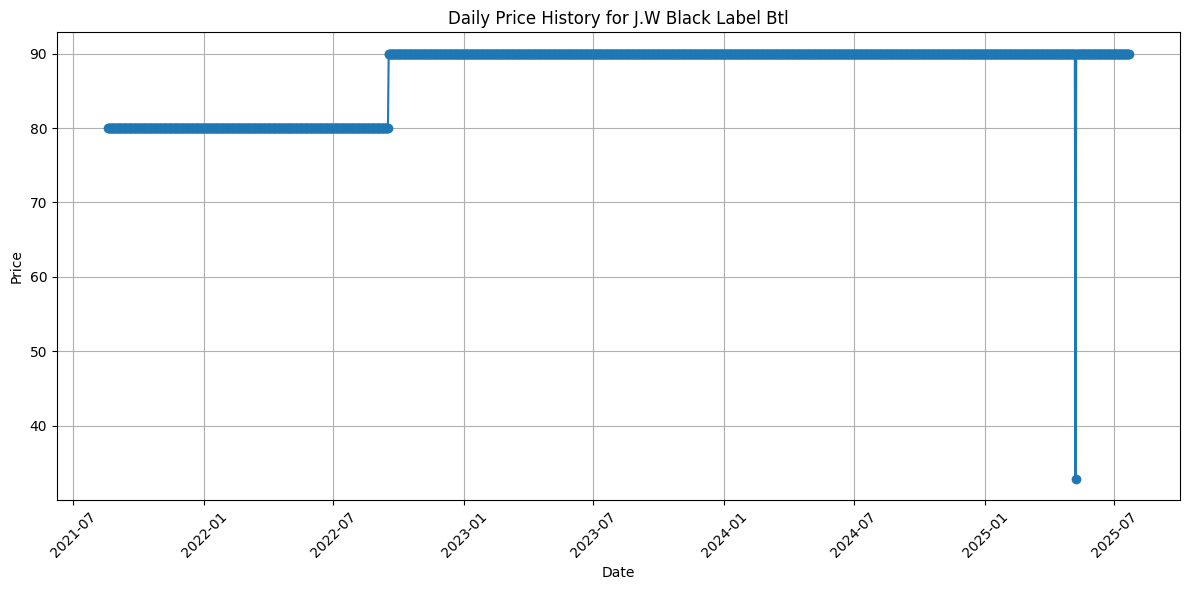

In [14]:
# plot the daily prices
plt.figure(figsize=(12, 6))
plt.plot(daily_prices_org['Sale_Date'], daily_prices_org['Price'], marker='o', linestyle='-')
plt.title(f'Daily Price History for {item}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# save the daily_prices to csv file with item name

import os


output_path = r'C:\Users\fadia\OneDrive\Desktop\Ody\sampel DataBase\Product_History_Reports\Btl'
file_name = f"{item.replace(' ', '_')}.csv"
output_file = f"{output_path}\{file_name}"
if not os.path.exists(output_path):
    os.makedirs(output_path)
item_df.to_csv(output_file, index=False)


<string>:8: SyntaxWarning: invalid escape sequence '\{'
<>:8: SyntaxWarning: invalid escape sequence '\{'
<string>:8: SyntaxWarning: invalid escape sequence '\{'
<>:8: SyntaxWarning: invalid escape sequence '\{'
C:\Users\fadia\AppData\Local\Temp\ipykernel_52892\545047162.py:8: SyntaxWarning: invalid escape sequence '\{'
  output_file = f"{output_path}\{file_name}"
